[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nguyenphuvinhtoan/SpecializedProject_HK231/blob/main/CIHP.ipynb)

# Mô tả chung về tập CIHP
1. Link tải dataset gốc: https://drive.google.com/drive/folders/1pSj0ypjjqEhE_ti9fc2qDkpxTQUc9BL1
2. Mô tả:
- Dữ liệu của tập **CIHP** được thu thập từ các nguồn tự do như Google, Bing; với các keywords như *family, couple, party, meeting,...*
- Sau khi dữ liệu được thu thập, chúng sẽ được đánh nhãn bởi tổ chức gán nhãn chuyên nghiệp và được kiểm soát chất lượng kỹ luỡng. Loại bỏ đi các ảnh có độ phân giải thấp, hoặc chứa chỉ từ 0-1 người.
- Tập ảnh **CIHP** gồm 38.280 ảnh với chú thích kỹ lưỡng và độ biến thiên về hình thức cũng như độ phức tạp cao. Bao gồm nhiều người trong một bức ảnh với các hình dáng khách nhau cũng như là môi trường xung quanh khác nhau. CIHP tập trung vào ngữ nghĩa semantic đối với nhiều người trong tự nhiên.
- Tập dữ liệu CIHP được gán nhãn từng pixel thể hiện 19 semantic part + 1 background trong mức độ instance. Các label tương tự như tập LIP, tuy nhiên có sự thay đổi nhỏ từ Jumpsuit sang Tosor-skin.
- Hình ảnh có độ phân giải cao. Vì thế có vai trò quan trọng và tính ứng dụng cao hơn trong thực tiễn khi mô hình được được huấn luyện trên tập dữ liệu này. Ví dụ: video giám sát,...
- 38.280 ảnh được chia thành 3 tập với phân bố như sau:
    + Training: 28.280 hình
    + Validation: 5.000 hình
    + Test: 5.000 hình

- Hình ảnh minh hoạ:
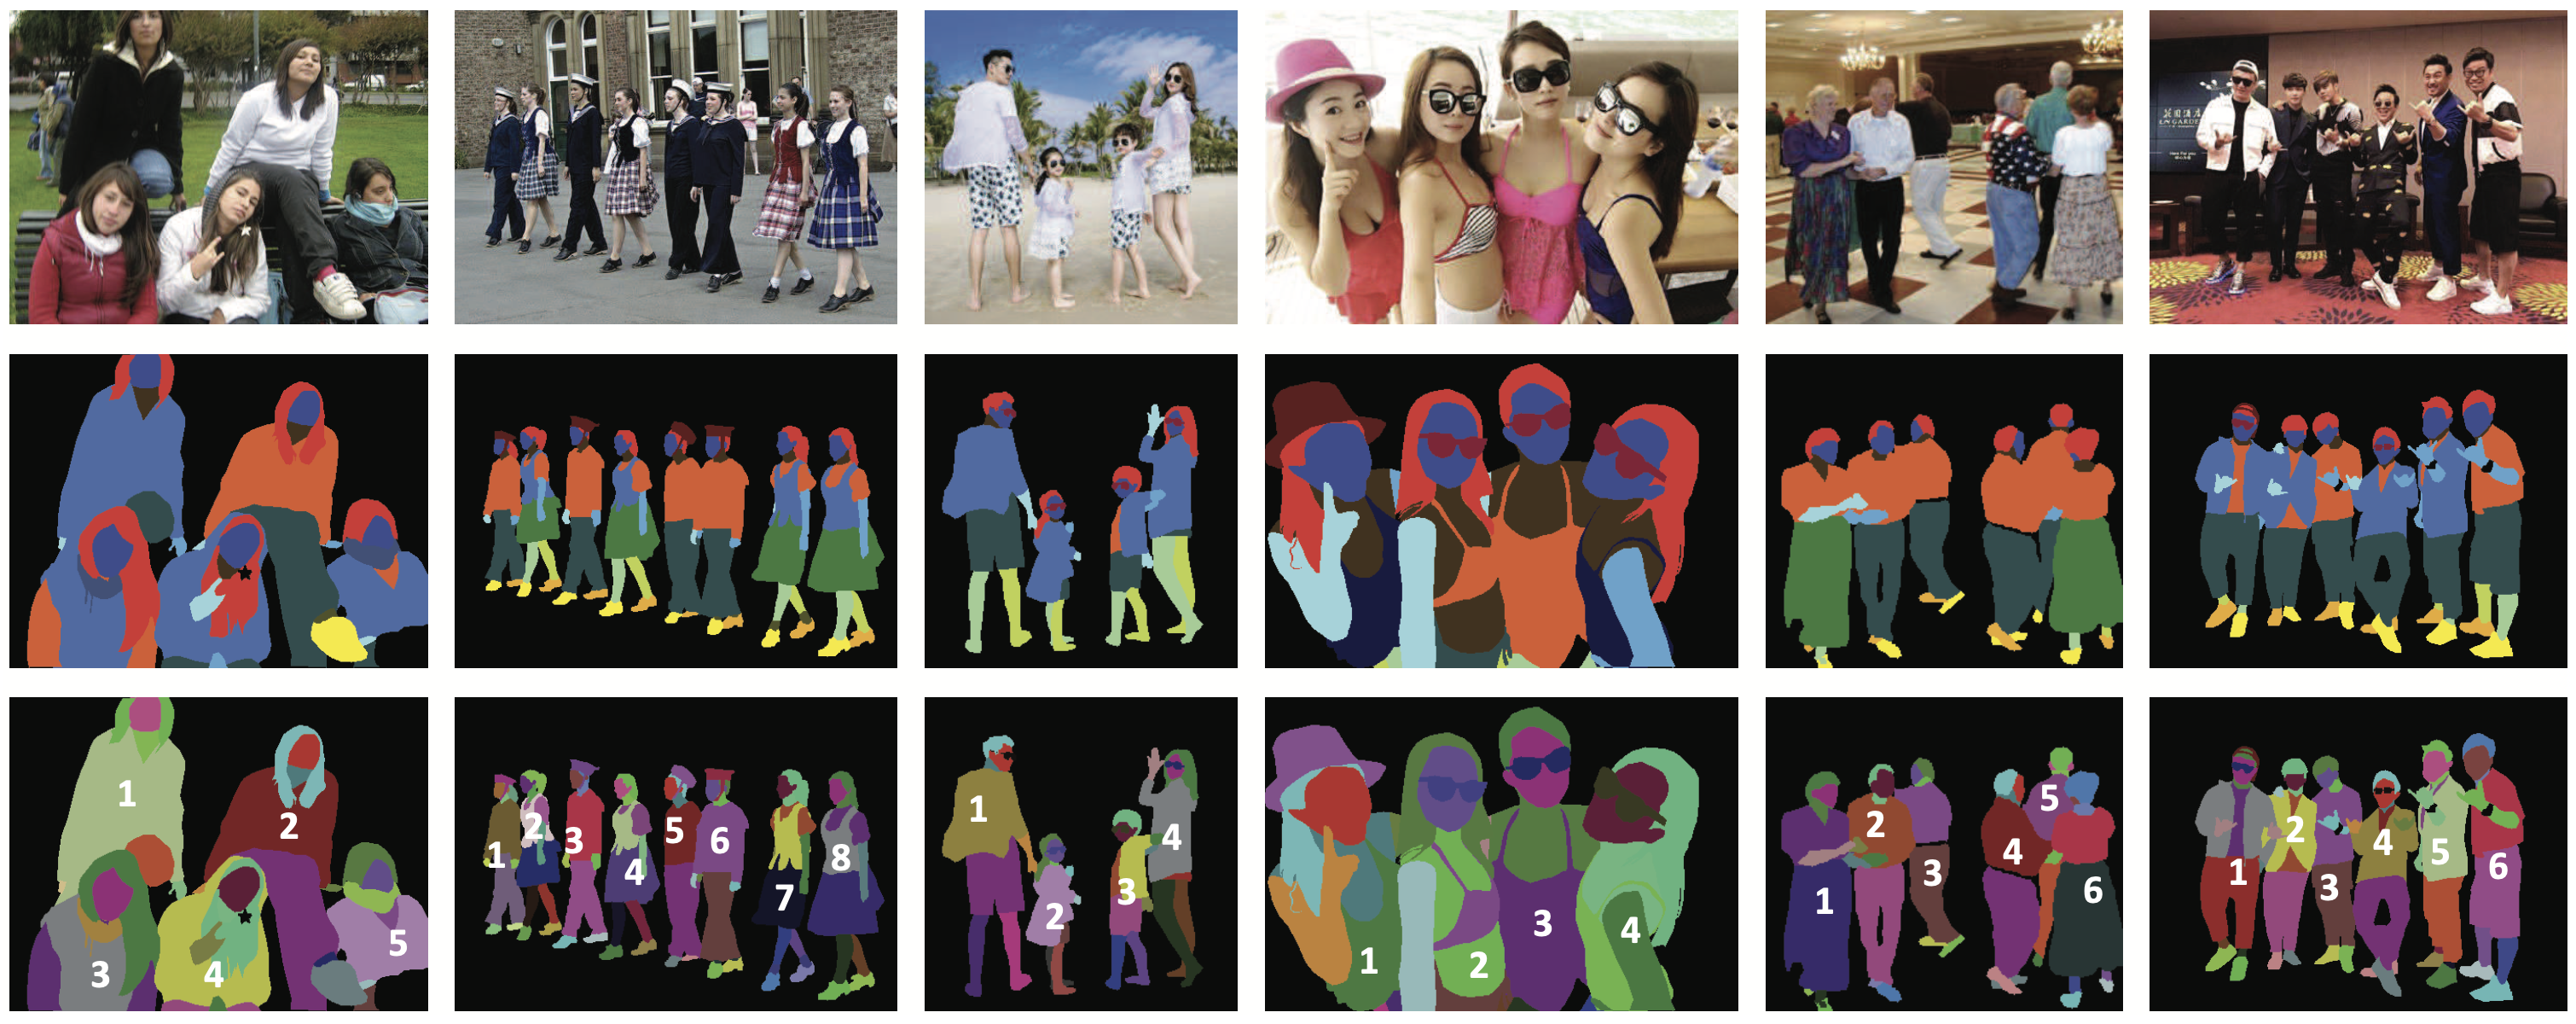

# 0. Import thư viện

In [ ]:
# import tensorflow as tf
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(threshold=np.inf)

In [ ]:
# Khai báo phổ màu cho label (BGR)
label_colours = [(0,0,0)
                # 0=Background
                ,(128,0,0),(255,0,0),(0,85,0),(170,0,51),(255,85,0)
                # 1=Hat,  2=Hair,    3=Glove, 4=Sunglasses, 5=UpperClothes
                ,(0,0,85),(0,119,221),(85,85,0),(0,85,85),(85,51,0)
                # 6=Dress, 7=Coat, 8=Socks, 9=Pants, 10=Jumpsuits
                ,(52,86,128),(0,128,0),(0,0,255),(51,170,221),(0,255,255)
                # 11=Scarf, 12=Skirt, 13=Face, 14=LeftArm, 15=RightArm
                ,(85,255,170),(170,255,85),(255,255,0),(255,170,0)]
                # 16=LeftLeg, 17=RightLeg, 18=LeftShoe, 19=RightShoe
# Turn this into BGR
for i, color in enumerate(label_colours):
  label_colours[i] = (color[2], color[1], color[0])
# Tên của mỗi label
label_names = ["Background", "Hat", "Hair", "Glove", "Sunglasses",
               "UpperClothes", "Dress", "Coat", "Socks", "Pants", "Jumpsuits",
               "Scarf", "Skirt", "Face", "LeftArm", "RightArm", "LeftLeg",
               "RightLeg", "LeftShoe", "RightShoe"]

# 1. Setup Kaggle

In [ ]:
# install the newest version of Kaggle API
! pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110683 sha256=522fb5b1869f3013863322ae24e559d70db1a224afe9098cd0d2f03cb96b7c57
  Stored in directory: /root/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [ ]:
# create .kaggle folder in the root folder
! mkdir ~/.kaggle
# copy the kaggle.json file that have been updated to the .kaggle folder
! cp kaggle.json ~/.kaggle/kaggle.json
# remove the kaggle.json in the current directory
! rm kaggle.json
# for security to make sure only you can access the .json credential file
! chmod 600 ~/.kaggle/kaggle.json

# 2. PGN_Train

## 2.1. Import data PGN_Train from Kaggle

In [ ]:
! kaggle datasets download -d nguyenphuvinhtoan/pgn-train

 96% 313M/326M [00:05<00:00, 95.2MB/s]
100% 326M/326M [00:05<00:00, 66.9MB/s]


In [ ]:
!unzip -qq pgn-train.zip

In [ ]:
!rm -rf pgn-train.zip

## 2.2. Image size PGN_Train

In [ ]:
category_ids_train = []
for human_id in os.listdir("/content/PGN_Train/Category_ids"):
    category_ids_train.append("/content/PGN_Train/Category_ids/"+str(human_id))

In [ ]:
category_label_train = [cv2.imread(category_id_train, cv2.IMREAD_GRAYSCALE) for category_id_train in category_ids_train]

In [ ]:
print(category_ids_train[0])
print(category_label_train[0].shape)

/content/PGN_Train/Category_ids/0019031.png
(400, 600)


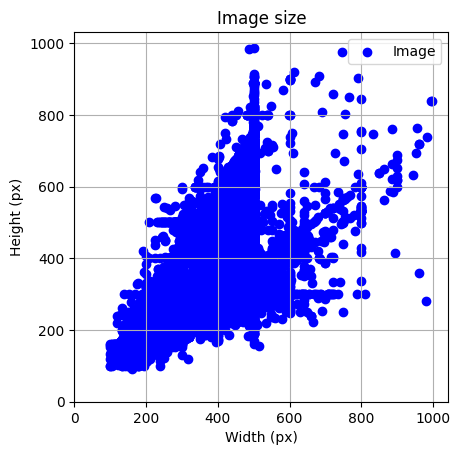

In [ ]:
# Tạo list là data để vẽ scatter plot (x, y)
data01 = [(label.shape[1], label.shape[0]) for label in category_label_train]
x01 = [point[0] for point in data01]
y01 = [point[1] for point in data01]
# Tạo plot
plt.scatter(x01, y01, label="Image", color="blue")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(left=0)
plt.ylim(bottom=0)
# Đánh tên cho trục
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.title("Image size")
plt.legend(loc="best")
# Hiện plot
plt.show()

In [ ]:
# Đổi biểu đồ scatter thành biểu đồ heatmap
# Chuẩn bị data để vẽ biểu đồ
x01_div50 = [x // 50 if x < 800 else 0 for x in x01]
y01_div50 = [y // 50 if y < 800 else 0 for y in y01]
data01_div50 = np.zeros((max(y01_div50) + 1, max(x01_div50) + 1))
for i in range(len(x01_div50)):
  data01_div50[y01_div50[i]][x01_div50[i]] += 1
x01_div50_labels = [(i+1)*50 for i in range(max(x01_div50) + 1)]
y01_div50_labels = [(i+1)*50 for i in range(max(y01_div50) + 1)]

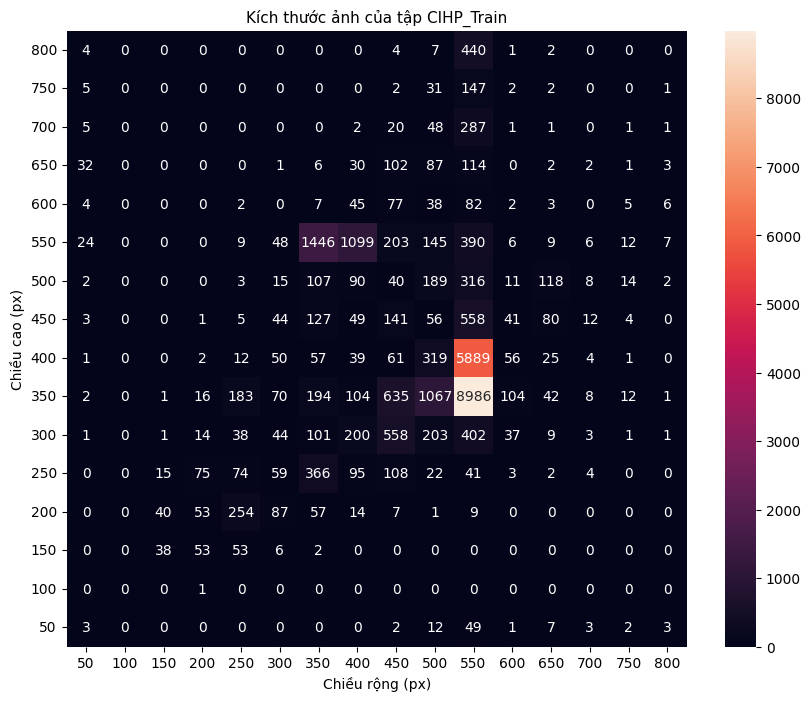

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
# Vẽ biểu đồ heatmap
hm = sns.heatmap(data=data01_div50, xticklabels=x01_div50_labels,
                 yticklabels=y01_div50_labels, annot=True, fmt='g', ax=ax)
hm.invert_yaxis()
# Đánh tên cho trục
plt.xlabel("Chiều rộng (px)")
plt.ylabel("Chiều cao (px)")
plt.title("Kích thước ảnh của tập CIHP_Train", fontsize=11)
plt.yticks(rotation=0)
# Hiện biểu đồ
plt.show()

In [ ]:
print("Width: [%d, %d]" % (min(x01), max(x01)))
print("Width Mean: %d" % (np.mean(np.array(x01))))
print("Width Variance: %d" % (np.var(np.array(x01))))
print("Width STD: %d" % (np.std(np.array(x01))))
print("Height: [%d, %d]" % (min(y01), max(y01)))
print("Height Mean: %d" % (np.mean(np.array(y01))))
print("Height Variance: %d" % (np.var(np.array(y01))))
print("Height STD: %d" % (np.std(np.array(y01))))

Width: [100, 998]
Width Mean: 459
Width Variance: 7288
Width STD: 85
Height: [90, 986]
Height Mean: 378
Height Variance: 11901
Height STD: 109


## 2.3. Number people in picture PGN_Train

In [ ]:
human_ids_train = []
for human_id in os.listdir("/content/PGN_Train/Human_ids"):
    human_ids_train.append("/content/PGN_Train/Human_ids/"+str(human_id))

In [ ]:
len(human_ids_train)

28280

In [ ]:
human_label_train = [cv2.imread(human_id_train, cv2.IMREAD_GRAYSCALE) for human_id_train in human_ids_train]

In [ ]:
# Create dict to count freq number of people
freq = {}
for label in human_label_train:
    num_of_people = np.max(label)
    if (str(num_of_people) in freq):
        freq[str(num_of_people)] += 1
    else:
        freq[str(num_of_people)] = 1
freq = dict(sorted(freq.items()))

In [ ]:
# Group number of people >=7
num_of_people = list(freq.keys())
get_7 = 0
for people in num_of_people:
    if int(people) >= 7:
        get_7 += freq.pop(str(people))
freq[">=7"] = get_7

In [ ]:
print(freq)

{'2': 14137, '3': 5615, '4': 3173, '5': 1930, '6': 1319, '>=7': 2106}


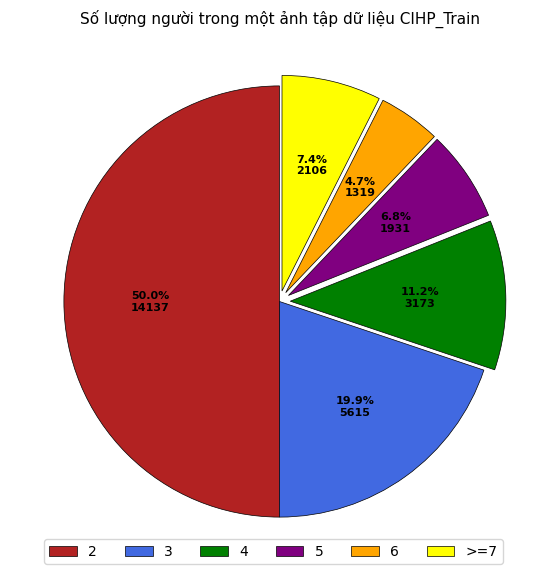

In [ ]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute+1)
# Creating explode data
explode = (0.0, 0.0, 0.05, 0.05, 0.05, 0.05)
# Creating color parameters
colors = ( "firebrick", "royalblue", "green", "purple", "orange", "yellow")
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
data = list(freq.values())
labels = list(freq.keys())
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = None,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
# Adding legend
ax.legend(wedges, labels,
          title ="",
          loc ="lower left",
          ncol=len(data),
          bbox_to_anchor =(0.05, 0, 0, 0))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Số lượng người trong một ảnh tập dữ liệu CIHP_Train", fontsize=11)

# show plot
plt.show()

## 2.4. The data distribution on 19 semantic part labels PGN_Train

In [ ]:
# Find out semantic part labels in each image
category_label_unique_value = [np.unique(label) for label in category_label_train]
category_label_unique_value_count = [len(uv) for uv in category_label_unique_value]

In [ ]:
# Label encode
label_names = ['0-background', '1-hat', '2-hair', '3-glove', '4-sunglasses', '5-upperclothes',
               '6-dress', '7-coat', '8-socks', '9-pants', '10-tosor-skin', '11-scarf', '12-skirt',
               '13-face', '14-leftArm', '15-rightArm', '16-leftLeg', '17-rightLeg', '18-leftShoe', '19-rightShoe']
# Phân loại màu cho tên label
label_is_human_part = [False, False, True, False, False, False, False, False,
                       False, False, True, False, False, True, True, True,
                       True, True, False, False]
# Set color for semantic part
plt02_color = [("red" if is_human_part else "blue") for is_human_part in label_is_human_part]

In [ ]:
# Đếm số ảnh có label được nhắc
img_per_label_count = [0] * len(label_names)
for label in category_label_unique_value:
    for uv in label:
        img_per_label_count[uv] += 1

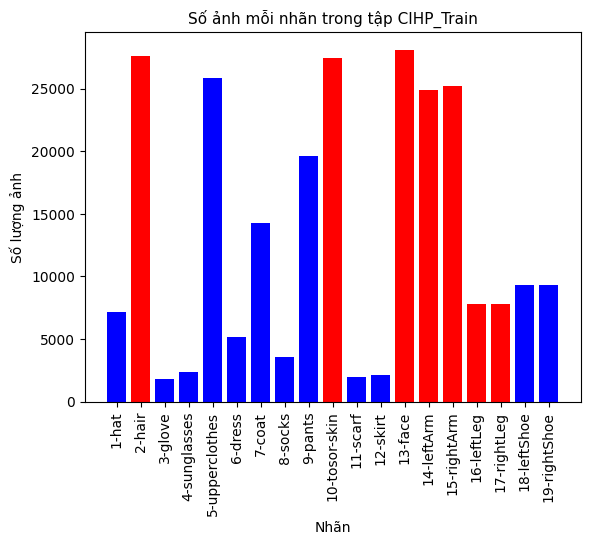

In [ ]:
# Tạo column chart
plt.bar(label_names[1:], img_per_label_count[1:], color=plt02_color[1:])
# Đánh tên cho trục
plt.xlabel("Nhãn")
plt.ylabel("Số lượng ảnh")
plt.title("Số ảnh mỗi nhãn trong tập CIHP_Train", fontsize=11)
plt.xticks(rotation=90)
# Hiện plot
plt.show()

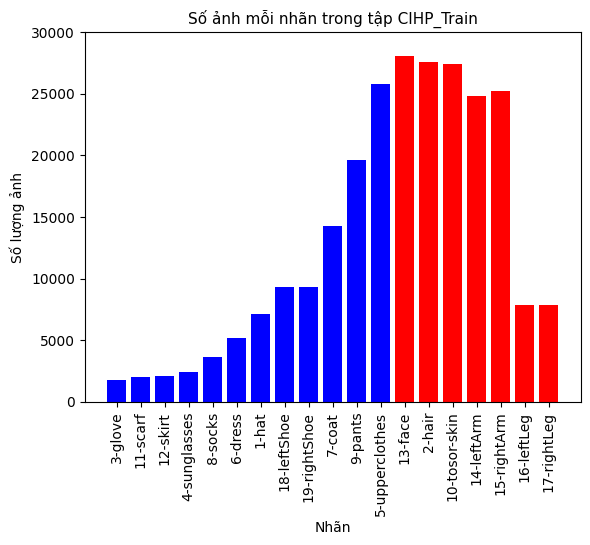

In [ ]:
# Tạo column chart được sắp xếp lại các cột theo nhóm màu
label_names_02, img_per_label_count_02, plt02_color_02 = ([], [], [])
sorter_idx = [3,11,12,4,8,6,1,18,19,7,9,5,13,2,10,14,15,16,17]
for i in range(len(sorter_idx)):
  label_names_02.append(label_names[sorter_idx[i]])
  img_per_label_count_02.append(img_per_label_count[sorter_idx[i]])
  plt02_color_02.append(plt02_color[sorter_idx[i]])

# Tạo column chart
plt.bar(label_names_02, img_per_label_count_02, color=plt02_color_02)
# Đánh tên cho trục
plt.xlabel("Nhãn")
plt.ylabel("Số lượng ảnh")
plt.title("Số ảnh mỗi nhãn trong tập CIHP_Train", fontsize=11)
plt.xticks(rotation=90)
plt.ylim(0,30000)
# Hiện plot
plt.show()

Thống kê theo tổng các nhãn

In [ ]:
# Không tính background
print(f"Miền giá trị: [{min(img_per_label_count[1:])}, {max(img_per_label_count[1:])}]")
print("Giá trị trung bình: %d" % (np.mean(np.array(img_per_label_count[1:]))))
print("Giá trị Variance: %d" % (np.var(np.array(img_per_label_count[1:]))))
print("Giá trị STD: %d" % (np.std(np.array(img_per_label_count[1:]))))

Miền giá trị: [1801, 28099]
Giá trị trung bình: 13228
Giá trị Variance: 99403630
Giá trị STD: 9970


Tách đôi việc đếm số hình cho nhãn bộ phận người và nhãn quần áo

In [ ]:
img_per_label_is_human = []
img_per_label_not_human = []
for i, img_per_label in enumerate(img_per_label_count):
  if label_is_human_part[i]:
    img_per_label_is_human.append(img_per_label)
  else:
    img_per_label_not_human.append(img_per_label)

Thống kê theo nhãn bộ phận người

In [ ]:
print(f"Miền giá trị: [{min(img_per_label_is_human)}, {max(img_per_label_is_human)}]")
print("Giá trị trung bình: %d" % (np.mean(np.array(img_per_label_is_human))))
print("Giá trị Variance: %d" % (np.var(np.array(img_per_label_is_human))))
print("Giá trị STD: %d" % (np.std(np.array(img_per_label_is_human))))

Miền giá trị: [7817, 28099]
Giá trị trung bình: 21255
Giá trị Variance: 73498212
Giá trị STD: 8573


Thống kê theo nhãn trang phục

In [ ]:
# Không tính background
print(f"Miền giá trị: [{min(img_per_label_not_human[1:])}, {max(img_per_label_not_human[1:])}]")
print("Giá trị trung bình: %d" % (np.mean(np.array(img_per_label_not_human[1:]))))
print("Giá trị Variance: %d" % (np.var(np.array(img_per_label_not_human[1:]))))
print("Giá trị STD: %d" % (np.std(np.array(img_per_label_not_human[1:]))))

Miền giá trị: [1801, 25816]
Giá trị trung bình: 8546
Giá trị Variance: 55011252
Giá trị STD: 7416


## 2.5 Thống kê số lượng ảnh có số lượng label tương ứng

In [ ]:
# Không tính background
label_array_uvc_no_bg = []
for i in range(len(category_label_unique_value_count)):
  label_array_uvc_no_bg.append(category_label_unique_value_count[i] - 1)
img_count_as_label_amount_no_bg = [0] * len(label_names)
for label_count in label_array_uvc_no_bg:
  img_count_as_label_amount_no_bg[label_count] += 1

In [ ]:
for i, label_count in enumerate(category_label_unique_value_count):
  if label_count == 1: print(i)

In [ ]:
sum(img_count_as_label_amount_no_bg)

28280

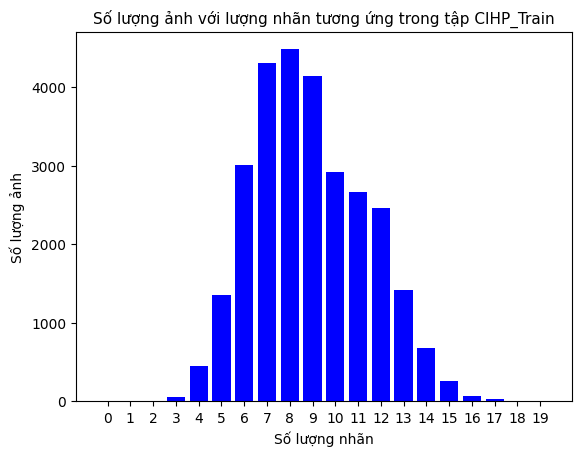

In [ ]:
# Tạo column chart
plt.bar(range(20), img_count_as_label_amount_no_bg, color="blue")
plt.xticks(range(20))
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn")
plt.ylabel("Số lượng ảnh")
plt.title("Số lượng ảnh với lượng nhãn tương ứng trong tập CIHP_Train", fontsize=11)
# Hiện plot
plt.show()

Chỉ số thống kê

In [ ]:
# Thống kê dựa trên số lượng nhãn
print(f"Range: [{min(label_array_uvc_no_bg)}, {max(label_array_uvc_no_bg)}]")
print("Mean: %0.1f" % (np.mean(np.array(label_array_uvc_no_bg))))
print("Variance: %0.1f" % (np.var(np.array(label_array_uvc_no_bg))))
print("STD: %0.1f" % (np.std(np.array(label_array_uvc_no_bg))))

Range: [2, 18]
Mean: 8.9
Variance: 6.1
STD: 2.5


## 2.6. Thống kê tỉ lệ nhãn bộ phận người và nhãn trang phục trên mỗi ảnh

In [ ]:
# Chuẩn bị data
human_label_per_img = [0] * len(category_ids_train)
non_human_label_per_img = [0] * len(category_ids_train)
for i, label_array in enumerate(category_label_unique_value):
  for label_idx in label_array:
    if label_is_human_part[label_idx]:
      human_label_per_img[i] += 1
    else:
      non_human_label_per_img[i] += 1
# Không tính background nên trừ bớt 1
for i in range(len(non_human_label_per_img)):
  non_human_label_per_img[i] -= 1
# Tạo ndarray data
data02 = np.zeros((max(non_human_label_per_img)+1, max(human_label_per_img)+1))
for i in range(len(human_label_per_img)):
  data02[non_human_label_per_img[i]][human_label_per_img[i]] += 1

In [ ]:
sum(sum(data02))

28280.0

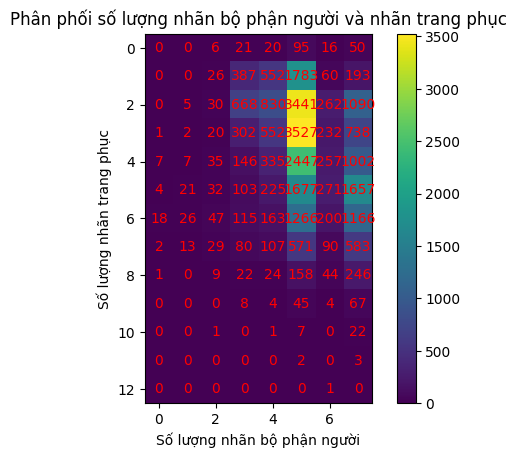

In [ ]:
# Tạo plot
plt.imshow(data02, interpolation='nearest')
plt.colorbar()
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn bộ phận người")
plt.ylabel("Số lượng nhãn trang phục")
plt.title("Phân phối số lượng nhãn bộ phận người và nhãn trang phục")
# Đánh số lên heatmap
for i in range(data02.shape[0]):
  for j in range(data02.shape[1]):
    plt.annotate(str(int(data02[i][j])), xy=(j, i),
                     ha='center', va='center', color='red')
# Hiện plot
plt.show()

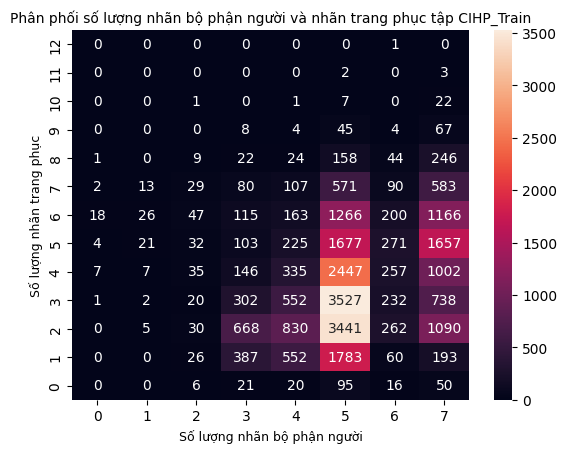

In [ ]:
hm = sns.heatmap(data=data02, annot=True, fmt='g')
hm.invert_yaxis()
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn bộ phận người", fontsize=9)
plt.ylabel("Số lượng nhãn trang phục", fontsize=9)
plt.title("Phân phối số lượng nhãn bộ phận người và nhãn trang phục tập CIHP_Train", fontsize=10)
# Hiện biểu đồ
plt.show()

Thống kê số nhãn

In [ ]:
# Thống kê về số nhãn bộ phận người mỗi ảnh
print("Range: [%d, %d]" % (min(human_label_per_img), max(human_label_per_img)))
print("Mean: %.1f" % (np.mean(np.array(human_label_per_img))))
print("Variance: %.1f" % (np.var(np.array(human_label_per_img))))
print("STD: %.1f" % (np.std(np.array(human_label_per_img))))
# Thống kê về số nhãn quần áo mỗi ảnh
print("Range: [%d, %d]" % (min(non_human_label_per_img), max(non_human_label_per_img)))
print("Mean: %.1f" % (np.mean(np.array(non_human_label_per_img))))
print("Variance: %.1f" % (np.var(np.array(non_human_label_per_img))))
print("STD: %.1f" % (np.std(np.array(non_human_label_per_img))))

Range: [0, 7]
Mean: 5.3
Variance: 1.5
STD: 1.2
Range: [0, 12]
Mean: 3.6
Variance: 3.5
STD: 1.9


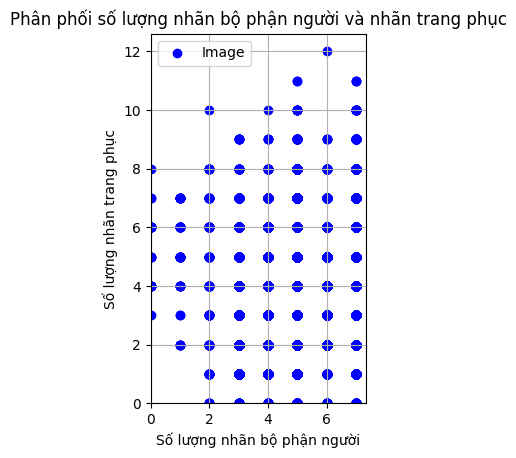

In [ ]:
# Tạo plot
plt.scatter(human_label_per_img, non_human_label_per_img, label="Image", color="blue")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(left=0)
plt.ylim(bottom=0)
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn bộ phận người")
plt.ylabel("Số lượng nhãn trang phục")
plt.title("Phân phối số lượng nhãn bộ phận người và nhãn trang phục")
plt.legend(loc="best")
# Hiện plot
plt.show()

# 3. PGN_Val

## 3.1. Import data PGN_Val from Kaggle

In [ ]:
! kaggle datasets download -d nguyenphuvinhtoan/pgn-val

 85% 49.0M/57.7M [00:00<00:00, 63.9MB/s]
100% 57.7M/57.7M [00:00<00:00, 63.4MB/s]


In [ ]:
!unzip -qq pgn-val.zip

In [ ]:
!rm -rf pgn-val.zip

## 3.2. Image size PGN_Val

In [ ]:
category_ids_val = []
for human_id in os.listdir("/content/PGN_Val/Category_ids"):
    category_ids_val.append("/content/PGN_Val/Category_ids/"+str(human_id))

In [ ]:
category_label_val = [cv2.imread(category_id_val, cv2.IMREAD_GRAYSCALE) for category_id_val in category_ids_val]

In [ ]:
print(category_ids_val[0])
print(category_label_val[0].shape)

/content/PGN_Val/Category_ids/0016287.png
(375, 500)


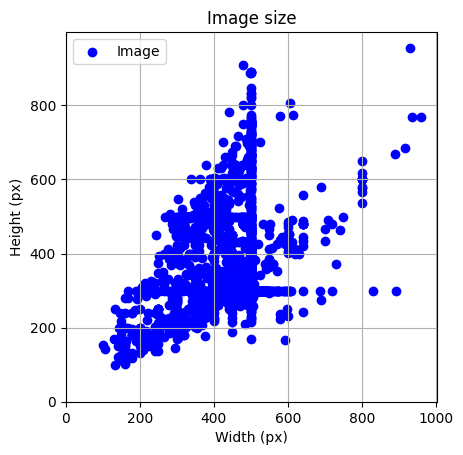

In [ ]:
# Tạo list là data để vẽ scatter plot (x, y)
data01 = [(label.shape[1], label.shape[0]) for label in category_label_val]
x01 = [point[0] for point in data01]
y01 = [point[1] for point in data01]
# Tạo plot
plt.scatter(x01, y01, label="Image", color="blue")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(left=0)
plt.ylim(bottom=0)
# Đánh tên cho trục
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.title("Image size")
plt.legend(loc="best")
# Hiện plot
plt.show()

In [ ]:
# Đổi biểu đồ scatter thành biểu đồ heatmap
# Chuẩn bị data để vẽ biểu đồ
x01_div50 = [x // 50 if x < 800 else 0 for x in x01]
y01_div50 = [y // 50 if y < 800 else 0 for y in y01]
data01_div50 = np.zeros((max(y01_div50) + 1, max(x01_div50) + 1))
for i in range(len(x01_div50)):
  data01_div50[y01_div50[i]][x01_div50[i]] += 1
x01_div50_labels = [(i+1)*50 for i in range(max(x01_div50) + 1)]
y01_div50_labels = [(i+1)*50 for i in range(max(y01_div50) + 1)]

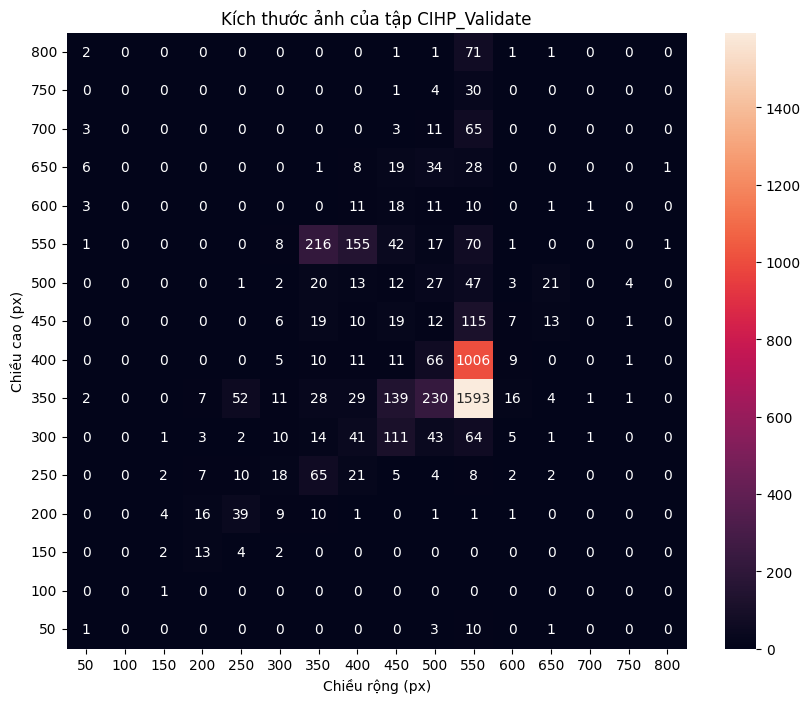

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
# Vẽ biểu đồ heatmap
hm = sns.heatmap(data=data01_div50, xticklabels=x01_div50_labels,
                 yticklabels=y01_div50_labels, annot=True, fmt='g', ax=ax)
hm.invert_yaxis()
# Đánh tên cho trục
plt.xlabel("Chiều rộng (px)")
plt.ylabel("Chiều cao (px)")
plt.title("Kích thước ảnh của tập CIHP_Validate")
plt.yticks(rotation=0)
# Hiện biểu đồ
plt.show()

In [ ]:
print("Width: [%d, %d]" % (min(x01), max(x01)))
print("Width Mean: %d" % (np.mean(np.array(x01))))
print("Width Variance: %d" % (np.var(np.array(x01))))
print("Width STD: %d" % (np.std(np.array(x01))))
print("Height: [%d, %d]" % (min(y01), max(y01)))
print("Height Mean: %d" % (np.mean(np.array(y01))))
print("Height Variance: %d" % (np.var(np.array(y01))))
print("Height STD: %d" % (np.std(np.array(y01))))

Width: [100, 960]
Width Mean: 460
Width Variance: 6943
Width STD: 83
Height: [99, 955]
Height Mean: 377
Height Variance: 12207
Height STD: 110


## 3.3. Number people in picture PGN_Val

In [ ]:
human_ids_val = []
for human_id in os.listdir("/content/PGN_Val/Human_ids"):
    human_ids_val.append("/content/PGN_Val/Human_ids/"+str(human_id))

In [ ]:
len(human_ids_val)

5000

In [ ]:
human_label_val = [cv2.imread(human_id_val, cv2.IMREAD_GRAYSCALE) for human_id_val in human_ids_val]

In [ ]:
# Create dict to count freq number of people
freq = {}
for label in human_label_val:
    num_of_people = np.max(label)
    if (str(num_of_people) in freq):
        freq[str(num_of_people)] += 1
    else:
        freq[str(num_of_people)] = 1
freq = dict(sorted(freq.items()))

In [ ]:
# Group number of people >=7
num_of_people = list(freq.keys())
get_7 = 0
for people in num_of_people:
    if int(people) >= 7:
        get_7 += freq.pop(str(people))
freq[">=7"] = get_7

In [ ]:
print(freq)

{'2': 2267, '3': 983, '4': 609, '5': 407, '6': 269, '>=7': 465}


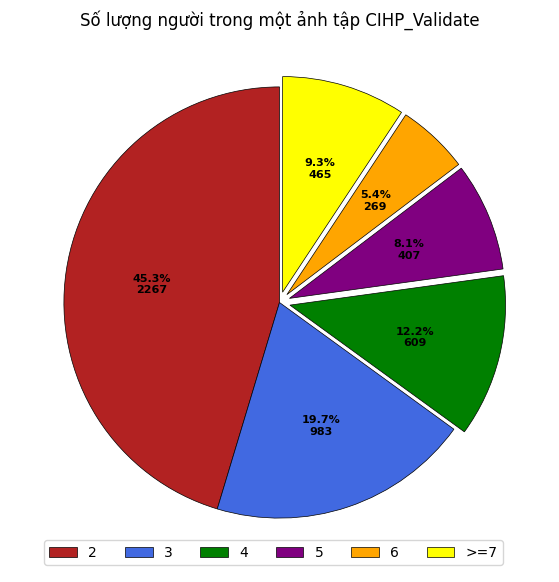

In [ ]:
# Creating autocpt arguments
import math
def func(pct, allvalues):
    # absolute = int(pct / 100.*np.sum(allvalues))
    # Hardcode
    if pct / 100.*np.sum(allvalues) - math.floor(pct / 100.*np.sum(allvalues)) < 0.1:
        absolute = int(pct / 100.*np.sum(allvalues))
    else:
        absolute = int(pct / 100.*np.sum(allvalues)) + 1
    return "{:.1f}%\n{:d}".format(pct, absolute)
# Creating explode data
explode = (0.0, 0.0, 0.05, 0.05, 0.05, 0.05)
# Creating color parameters
colors = ( "firebrick", "royalblue", "green", "purple", "orange", "yellow")
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
data = list(freq.values())
labels = list(freq.keys())
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = None,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
# Adding legend
ax.legend(wedges, labels,
          title ="",
          loc ="lower left",
          ncol=len(data),
          bbox_to_anchor =(0.05, 0, 0, 0))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Số lượng người trong một ảnh tập CIHP_Validate")

# show plot
plt.show()

## 3.4. The data distribution on 19 semantic part labels PGN_Val

In [ ]:
# Find out semantic part labels in each image
category_label_unique_value = [np.unique(label) for label in category_label_val]
category_label_unique_value_count = [len(uv) for uv in category_label_unique_value]

In [ ]:
# Label encode
label_names = ['background', 'hat', 'hair', 'glove', 'sunglasses', 'upperclothes',
               'dress', 'coat', 'socks', 'pants', 'tosor-skin', 'scarf', 'skirt',
               'face', 'leftArm', 'rightArm', 'leftLeg', 'rightLeg', 'leftShoe', 'rightShoe']
# Phân loại màu cho tên label
label_is_human_part = [False, False, True, False, False, False, False, False,
                       False, False, True, False, False, True, True, True,
                       True, True, True, True]
# Set color for semantic part
plt02_color = [("red" if is_human_part else "blue") for is_human_part in label_is_human_part]

In [ ]:
# Đếm số ảnh có label được nhắc
img_per_label_count = [0] * len(label_names)
for label in category_label_unique_value:
    for uv in label:
        img_per_label_count[uv] += 1

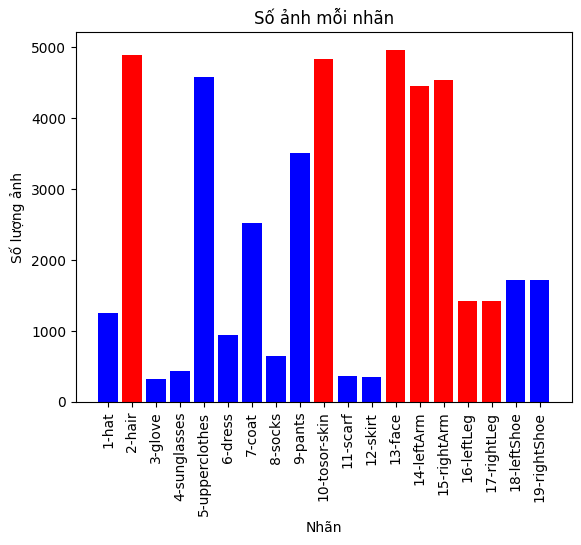

In [ ]:
# Tạo column chart
plt.bar(label_names[1:], img_per_label_count[1:], color=plt02_color[1:])
# Đánh tên cho trục
plt.xlabel("Nhãn")
plt.ylabel("Số lượng ảnh")
plt.title("Số ảnh mỗi nhãn")
plt.xticks(rotation=90)
# Hiện plot
plt.show()

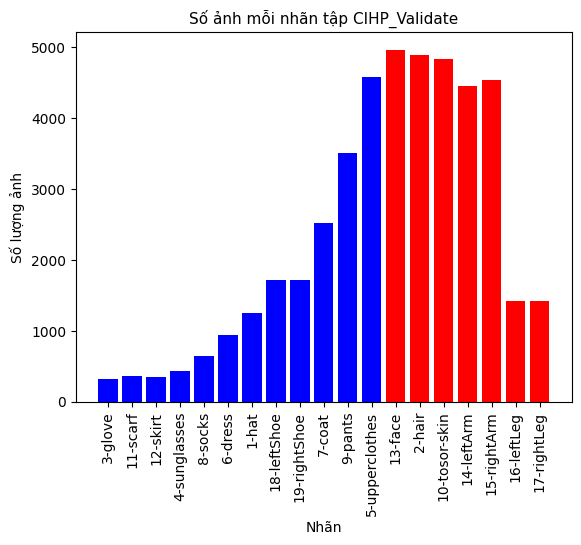

In [ ]:
# Tạo column chart được sắp xếp lại các cột theo nhóm màu
label_names_02, img_per_label_count_02, plt02_color_02 = ([], [], [])
sorter_idx = [3,11,12,4,8,6,1,18,19,7,9,5,13,2,10,14,15,16,17]
for i in range(len(sorter_idx)):
  label_names_02.append(label_names[sorter_idx[i]])
  img_per_label_count_02.append(img_per_label_count[sorter_idx[i]])
  plt02_color_02.append(plt02_color[sorter_idx[i]])

# Tạo column chart
plt.bar(label_names_02, img_per_label_count_02, color=plt02_color_02)
# Đánh tên cho trục
plt.xlabel("Nhãn")
plt.ylabel("Số lượng ảnh")
plt.title("Số ảnh mỗi nhãn tập CIHP_Validate", fontsize=11)
plt.xticks(rotation=90)
# Hiện plot
plt.show()

Thống kê theo tổng các nhãn

In [ ]:
# Không tính background
print(f"Miền giá trị: [{min(img_per_label_count[1:])}, {max(img_per_label_count[1:])}]")
print("Giá trị trung bình: %d" % (np.mean(np.array(img_per_label_count[1:]))))
print("Giá trị Variance: %d" % (np.var(np.array(img_per_label_count[1:]))))
print("Giá trị STD: %d" % (np.std(np.array(img_per_label_count[1:]))))

Miền giá trị: [316, 4965]
Giá trị trung bình: 2360
Giá trị Variance: 3129918
Giá trị STD: 1769


Tách đôi việc đếm số hình cho nhãn bộ phận người và nhãn quần áo

In [ ]:
img_per_label_is_human = []
img_per_label_not_human = []
for i, img_per_label in enumerate(img_per_label_count):
  if label_is_human_part[i]:
    img_per_label_is_human.append(img_per_label)
  else:
    img_per_label_not_human.append(img_per_label)

Thống kê theo nhãn bộ phận người

In [ ]:
print(f"Miền giá trị: [{min(img_per_label_is_human)}, {max(img_per_label_is_human)}]")
print("Giá trị trung bình: %d" % (np.mean(np.array(img_per_label_is_human))))
print("Giá trị Variance: %d" % (np.var(np.array(img_per_label_is_human))))
print("Giá trị STD: %d" % (np.std(np.array(img_per_label_is_human))))

Miền giá trị: [1415, 4965]
Giá trị trung bình: 3788
Giá trị Variance: 2276624
Giá trị STD: 1508


Thống kê theo nhãn trang phục

In [ ]:
# Không tính background
print(f"Miền giá trị: [{min(img_per_label_not_human[1:])}, {max(img_per_label_not_human[1:])}]")
print("Giá trị trung bình: %d" % (np.mean(np.array(img_per_label_not_human[1:]))))
print("Giá trị Variance: %d" % (np.var(np.array(img_per_label_not_human[1:]))))
print("Giá trị STD: %d" % (np.std(np.array(img_per_label_not_human[1:]))))

Miền giá trị: [316, 4584]
Giá trị trung bình: 1527
Giá trị Variance: 1744697
Giá trị STD: 1320


## 3.5 Thống kê số lượng ảnh có số lượng label tương ứng

In [ ]:
# Không tính background
label_array_uvc_no_bg = []
for i in range(len(category_label_unique_value_count)):
  label_array_uvc_no_bg.append(category_label_unique_value_count[i] - 1)
img_count_as_label_amount_no_bg = [0] * len(label_names)
for label_count in label_array_uvc_no_bg:
  img_count_as_label_amount_no_bg[label_count] += 1

In [ ]:
for i, label_count in enumerate(category_label_unique_value_count):
  if label_count == 1: print(i)

In [ ]:
sum(img_count_as_label_amount_no_bg)

5000

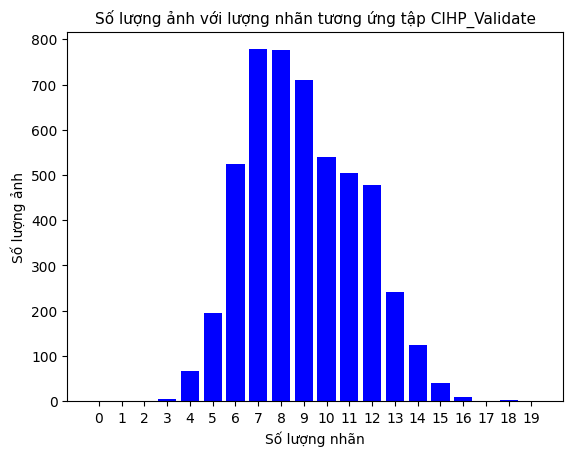

In [ ]:
# Tạo column chart
plt.bar(range(20), img_count_as_label_amount_no_bg, color="blue")
plt.xticks(range(20))
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn")
plt.ylabel("Số lượng ảnh")
plt.title("Số lượng ảnh với lượng nhãn tương ứng tập CIHP_Validate", fontsize=11)
# Hiện plot
plt.show()

Chỉ số thống kê

In [ ]:
# Thống kê dựa trên số lượng nhãn
print(f"Range: [{min(label_array_uvc_no_bg)}, {max(label_array_uvc_no_bg)}]")
print("Mean: %0.1f" % (np.mean(np.array(label_array_uvc_no_bg))))
print("Variance: %0.1f" % (np.var(np.array(label_array_uvc_no_bg))))
print("STD: %0.1f" % (np.std(np.array(label_array_uvc_no_bg))))

Range: [3, 18]
Mean: 9.0
Variance: 5.9
STD: 2.4


## 3.6. Thống kê tỉ lệ nhãn bộ phận người và nhãn trang phục trên mỗi ảnh

In [ ]:
# Chuẩn bị data
human_label_per_img = [0] * len(category_ids_val)
non_human_label_per_img = [0] * len(category_ids_val)
for i, label_array in enumerate(category_label_unique_value):
  for label_idx in label_array:
    if label_is_human_part[label_idx]:
      human_label_per_img[i] += 1
    else:
      non_human_label_per_img[i] += 1
# Không tính background nên trừ bớt 1
for i in range(len(non_human_label_per_img)):
  non_human_label_per_img[i] -= 1
# Tạo ndarray data
data02 = np.zeros((max(non_human_label_per_img)+1, max(human_label_per_img)+1))
for i in range(len(human_label_per_img)):
  data02[non_human_label_per_img[i]][human_label_per_img[i]] += 1

In [ ]:
sum(sum(data02))

5000.0

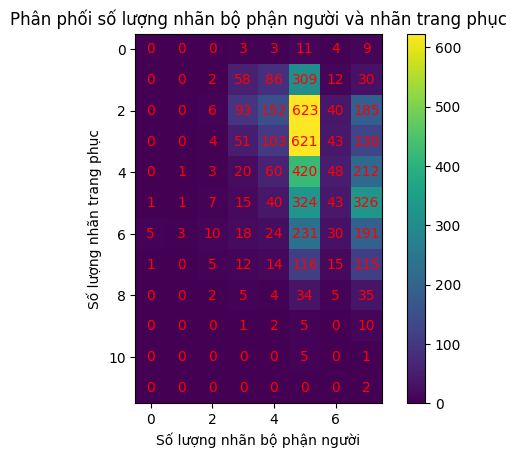

In [ ]:
# Tạo plot
plt.imshow(data02, interpolation='nearest')
plt.colorbar()
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn bộ phận người")
plt.ylabel("Số lượng nhãn trang phục")
plt.title("Phân phối số lượng nhãn bộ phận người và nhãn trang phục")
# Đánh số lên heatmap
for i in range(data02.shape[0]):
  for j in range(data02.shape[1]):
    plt.annotate(str(int(data02[i][j])), xy=(j, i),
                     ha='center', va='center', color='red')
# Hiện plot
plt.show()

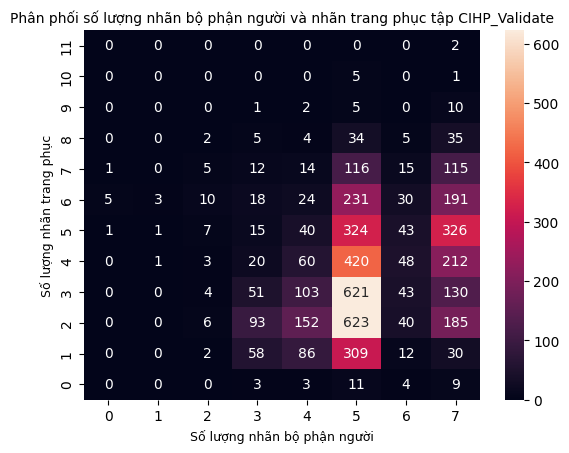

In [ ]:
hm = sns.heatmap(data=data02, annot=True, fmt='g')
hm.invert_yaxis()
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn bộ phận người", fontsize=9)
plt.ylabel("Số lượng nhãn trang phục", fontsize=9)
plt.title("Phân phối số lượng nhãn bộ phận người và nhãn trang phục tập CIHP_Validate", fontsize=10)
# Hiện biểu đồ
plt.show()

Thống kê số nhãn

In [ ]:
# Thống kê về số nhãn bộ phận người mỗi ảnh
print("Range: [%d, %d]" % (min(human_label_per_img), max(human_label_per_img)))
print("Mean: %.1f" % (np.mean(np.array(human_label_per_img))))
print("Variance: %.1f" % (np.var(np.array(human_label_per_img))))
print("STD: %.1f" % (np.std(np.array(human_label_per_img))))
# Thống kê về số nhãn quần áo mỗi ảnh
print("Range: [%d, %d]" % (min(non_human_label_per_img), max(non_human_label_per_img)))
print("Mean: %.1f" % (np.mean(np.array(non_human_label_per_img))))
print("Variance: %.1f" % (np.var(np.array(non_human_label_per_img))))
print("STD: %.1f" % (np.std(np.array(non_human_label_per_img))))

Range: [0, 7]
Mean: 5.3
Variance: 1.4
STD: 1.2
Range: [0, 11]
Mean: 3.7
Variance: 3.4
STD: 1.9


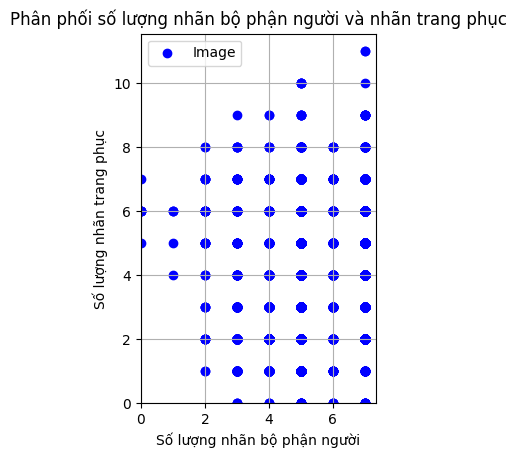

In [ ]:
# Tạo plot
plt.scatter(human_label_per_img, non_human_label_per_img, label="Image", color="blue")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(left=0)
plt.ylim(bottom=0)
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn bộ phận người")
plt.ylabel("Số lượng nhãn trang phục")
plt.title("Phân phối số lượng nhãn bộ phận người và nhãn trang phục")
plt.legend(loc="best")
# Hiện plot
plt.show()

# 4. PGN_TrainVal

## 4.1. Import data PGN_TrainVal from Kaggle

In [ ]:
!kaggle datasets download -d nguyenphuvinhtoan/pgn-trainval

 99% 382M/384M [00:18<00:00, 27.7MB/s]
100% 384M/384M [00:18<00:00, 22.1MB/s]


In [ ]:
!unzip -qq pgn-trainval.zip

In [ ]:
!rm -rf pgn-trainval.zip

## 4.2. Image size PGN_TrainVal

In [ ]:
category_ids_trainval = []
for human_id in os.listdir("/content/PGN_Train+Val/Category_ids"):
    category_ids_trainval.append("/content/PGN_Train+Val/Category_ids/"+str(human_id))

In [ ]:
category_label_trainval = [cv2.imread(category_id_trainval, cv2.IMREAD_GRAYSCALE) for category_id_trainval in category_ids_trainval]

In [ ]:
print(category_ids_trainval[0])
print(category_label_trainval[0].shape)

/content/PGN_Train+Val/Category_ids/0019031.png
(400, 600)


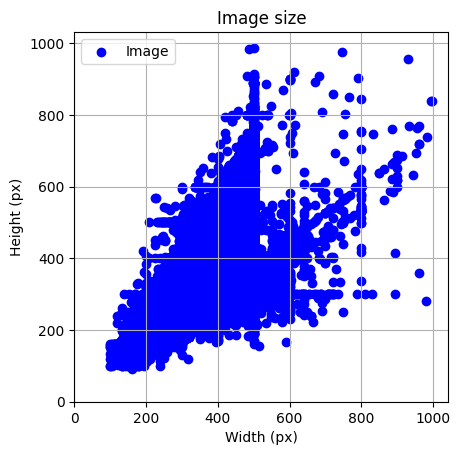

In [ ]:
# Tạo list là data để vẽ scatter plot (x, y)
data01 = [(label.shape[1], label.shape[0]) for label in category_label_trainval]
x01 = [point[0] for point in data01]
y01 = [point[1] for point in data01]
# Tạo plot
plt.scatter(x01, y01, label="Image", color="blue")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(left=0)
plt.ylim(bottom=0)
# Đánh tên cho trục
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.title("Image size")
plt.legend(loc="best")
# Hiện plot
plt.show()

In [ ]:
# Đổi biểu đồ scatter thành biểu đồ heatmap
# Chuẩn bị data để vẽ biểu đồ
x01_div50 = [x // 50 if x < 800 else 0 for x in x01]
y01_div50 = [y // 50 if y < 800 else 0 for y in y01]
data01_div50 = np.zeros((max(y01_div50) + 1, max(x01_div50) + 1))
for i in range(len(x01_div50)):
  data01_div50[y01_div50[i]][x01_div50[i]] += 1
x01_div50_labels = [(i+1)*50 for i in range(max(x01_div50) + 1)]
y01_div50_labels = [(i+1)*50 for i in range(max(y01_div50) + 1)]

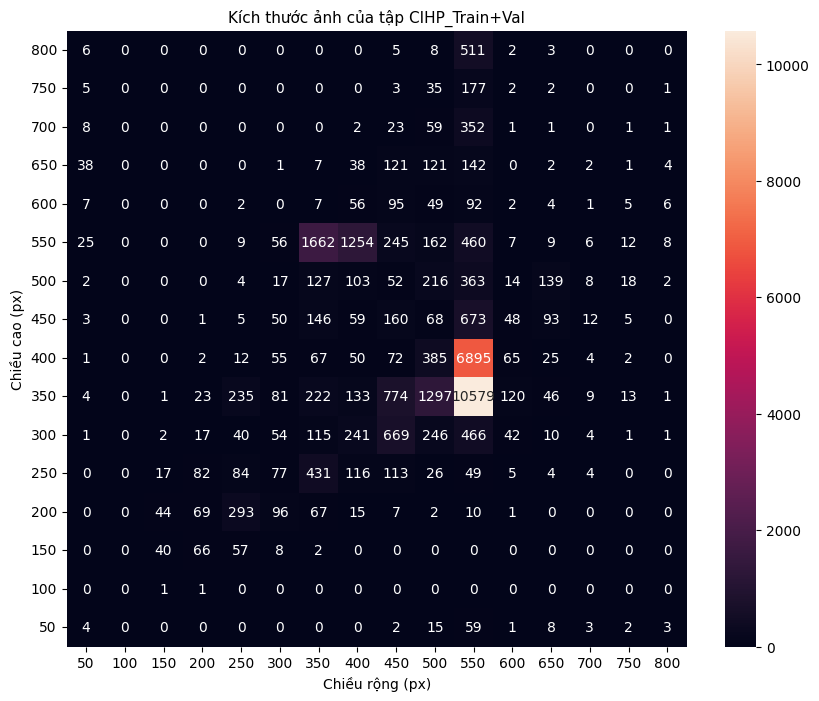

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
# Vẽ biểu đồ heatmap
hm = sns.heatmap(data=data01_div50, xticklabels=x01_div50_labels,
                 yticklabels=y01_div50_labels, annot=True, fmt='g', ax=ax)
hm.invert_yaxis()
# Đánh tên cho trục
plt.xlabel("Chiều rộng (px)")
plt.ylabel("Chiều cao (px)")
plt.title("Kích thước ảnh của tập CIHP_Train+Val", fontsize=11)
plt.yticks(rotation=0)
# Hiện biểu đồ
plt.show()

In [ ]:
print("Width: [%d, %d]" % (min(x01), max(x01)))
print("Width Mean: %d" % (np.mean(np.array(x01))))
print("Width Variance: %d" % (np.var(np.array(x01))))
print("Width STD: %d" % (np.std(np.array(x01))))
print("Height: [%d, %d]" % (min(y01), max(y01)))
print("Height Mean: %d" % (np.mean(np.array(y01))))
print("Height Variance: %d" % (np.var(np.array(y01))))
print("Height STD: %d" % (np.std(np.array(y01))))

Width: [100, 998]
Width Mean: 460
Width Variance: 7237
Width STD: 85
Height: [90, 986]
Height Mean: 378
Height Variance: 11947
Height STD: 109


## 4.3. Number people in picture PGN_TrainVal

In [ ]:
human_ids_trainval = []
for human_id in os.listdir("/content/PGN_Train+Val/Human_ids"):
    human_ids_trainval.append("/content/PGN_Train+Val/Human_ids/"+str(human_id))

In [ ]:
len(human_ids_trainval)

33280

In [ ]:
human_label_trainval = [cv2.imread(human_id_trainval, cv2.IMREAD_GRAYSCALE) for human_id_trainval in human_ids_trainval]

In [ ]:
# Create dict to count freq number of people
freq = {}
for label in human_label_trainval:
    num_of_people = np.max(label)
    if (str(num_of_people) in freq):
        freq[str(num_of_people)] += 1
    else:
        freq[str(num_of_people)] = 1
freq = dict(sorted(freq.items()))

In [ ]:
# Group number of people >=7
num_of_people = list(freq.keys())
get_7 = 0
for people in num_of_people:
    if int(people) >= 7:
        get_7 += freq.pop(str(people))
freq[">=7"] = get_7

In [ ]:
print(freq)

{'2': 16404, '3': 6598, '4': 3782, '5': 2337, '6': 1588, '>=7': 2571}


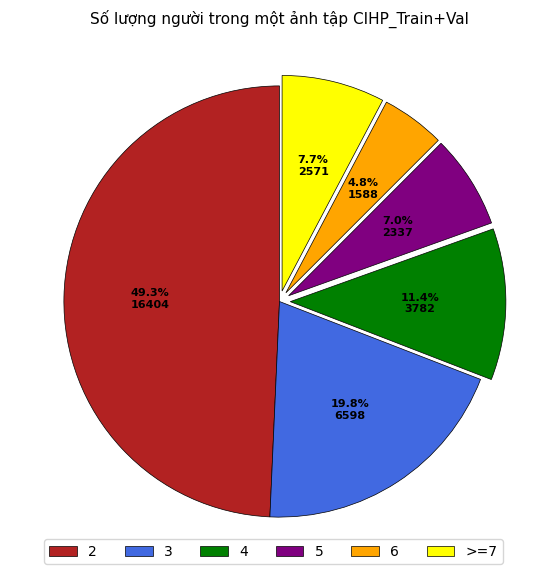

In [ ]:
import math
# Creating autocpt arguments
def func(pct, allvalues):
    # absolute = int(pct / 100.*np.sum(allvalues))
    # Hardcode
    if pct / 100.*np.sum(allvalues) - math.floor(pct / 100.*np.sum(allvalues)) < 0.1:
        absolute = int(pct / 100.*np.sum(allvalues))
    else:
        absolute = int(pct / 100.*np.sum(allvalues)) + 1
    return "{:.1f}%\n{:d}".format(pct, absolute)
# Creating explode data
explode = (0.0, 0.0, 0.05, 0.05, 0.05, 0.05)
# Creating color parameters
colors = ( "firebrick", "royalblue", "green", "purple", "orange", "yellow")
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
data = list(freq.values())
labels = list(freq.keys())
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = None,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
# Adding legend
ax.legend(wedges, labels,
          title ="",
          loc ="lower left",
          ncol=len(data),
          bbox_to_anchor =(0.05, 0, 0, 0))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Số lượng người trong một ảnh tập CIHP_Train+Val", fontsize=11)

# show plot
plt.show()

## 4.4. The data distribution on 19 semantic part labels PGN_TrainVal

In [ ]:
# Find out semantic part labels in each image
category_label_unique_value = [np.unique(label) for label in category_label_trainval]
category_label_unique_value_count = [len(uv) for uv in category_label_unique_value]

In [ ]:
# Label encode
label_names = ['0-background', '1-hat', '2-hair', '3-glove', '4-sunglasses', '5-upperclothes',
               '6-dress', '7-coat', '8-socks', '9-pants', '10-tosor-skin', '11-scarf', '12-skirt',
               '13-face', '14-leftArm', '15-rightArm', '16-leftLeg', '17-rightLeg', '18-leftShoe', '19-rightShoe']
# Phân loại màu cho tên label
label_is_human_part = [False, False, True, False, False, False, False, False,
                       False, False, True, False, False, True, True, True,
                       True, True, False, False]
# Set color for semantic part
plt02_color = [("red" if is_human_part else "blue") for is_human_part in label_is_human_part]

In [ ]:
# Đếm số ảnh có label được nhắc
img_per_label_count = [0] * len(label_names)
for label in category_label_unique_value:
    for uv in label:
        img_per_label_count[uv] += 1

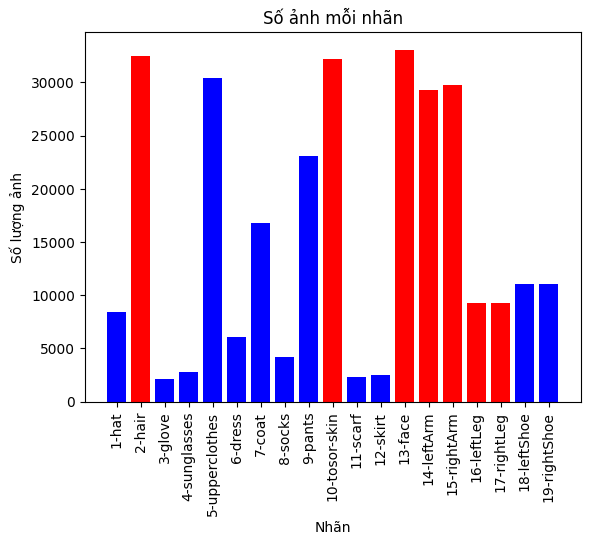

In [ ]:
# Tạo column chart
plt.bar(label_names[1:], img_per_label_count[1:], color=plt02_color[1:])
# Đánh tên cho trục
plt.xlabel("Nhãn")
plt.ylabel("Số lượng ảnh")
plt.title("Số ảnh mỗi nhãn")
plt.xticks(rotation=90)
# Hiện plot
plt.show()

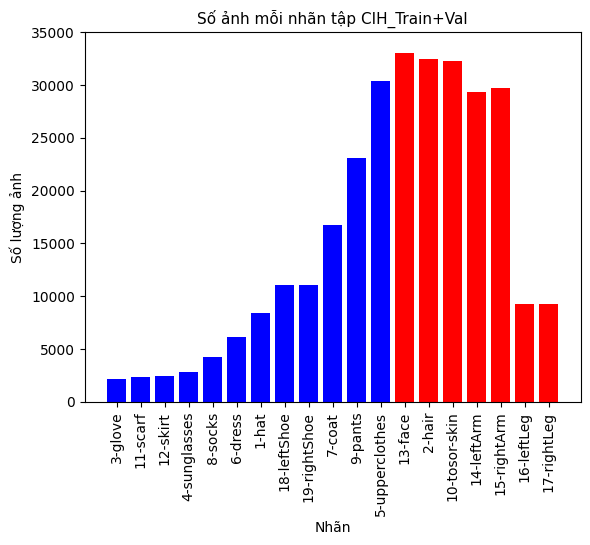

In [ ]:
# Tạo column chart được sắp xếp lại các cột theo nhóm màu
label_names_02, img_per_label_count_02, plt02_color_02 = ([], [], [])
sorter_idx = [3,11,12,4,8,6,1,18,19,7,9,5,13,2,10,14,15,16,17]
for i in range(len(sorter_idx)):
  label_names_02.append(label_names[sorter_idx[i]])
  img_per_label_count_02.append(img_per_label_count[sorter_idx[i]])
  plt02_color_02.append(plt02_color[sorter_idx[i]])

# Tạo column chart
plt.bar(label_names_02, img_per_label_count_02, color=plt02_color_02)
# Đánh tên cho trục
plt.xlabel("Nhãn")
plt.ylabel("Số lượng ảnh")
plt.title("Số ảnh mỗi nhãn tập CIH_Train+Val", fontsize=11)
plt.xticks(rotation=90)
plt.ylim(0,35000)
# Hiện plot
plt.show()

Thống kê theo tổng các nhãn

In [ ]:
# Không tính background
print(f"Miền giá trị: [{min(img_per_label_count[1:])}, {max(img_per_label_count[1:])}]")
print("Giá trị trung bình: %d" % (np.mean(np.array(img_per_label_count[1:]))))
print("Giá trị Variance: %d" % (np.var(np.array(img_per_label_count[1:]))))
print("Giá trị STD: %d" % (np.std(np.array(img_per_label_count[1:]))))

Miền giá trị: [2117, 33064]
Giá trị trung bình: 15589
Giá trị Variance: 137806457
Giá trị STD: 11739


Tách đôi việc đếm số hình cho nhãn bộ phận người và nhãn quần áo

In [ ]:
img_per_label_is_human = []
img_per_label_not_human = []
for i, img_per_label in enumerate(img_per_label_count):
  if label_is_human_part[i]:
    img_per_label_is_human.append(img_per_label)
  else:
    img_per_label_not_human.append(img_per_label)

Thống kê theo nhãn bộ phận người

In [ ]:
print(f"Miền giá trị: [{min(img_per_label_is_human)}, {max(img_per_label_is_human)}]")
print("Giá trị trung bình: %d" % (np.mean(np.array(img_per_label_is_human))))
print("Giá trị Variance: %d" % (np.var(np.array(img_per_label_is_human))))
print("Giá trị STD: %d" % (np.std(np.array(img_per_label_is_human))))

Miền giá trị: [9232, 33064]
Giá trị trung bình: 25044
Giá trị Variance: 101639825
Giá trị STD: 10081


Thống kê theo nhãn trang phục

In [ ]:
# Không tính background
print(f"Miền giá trị: [{min(img_per_label_not_human[1:])}, {max(img_per_label_not_human[1:])}]")
print("Giá trị trung bình: %d" % (np.mean(np.array(img_per_label_not_human[1:]))))
print("Giá trị Variance: %d" % (np.var(np.array(img_per_label_not_human[1:]))))
print("Giá trị STD: %d" % (np.std(np.array(img_per_label_not_human[1:]))))

Miền giá trị: [2117, 30400]
Giá trị trung bình: 10074
Giá trị Variance: 76346604
Giá trị STD: 8737


## 4.5 Thống kê số lượng ảnh có số lượng label tương ứng

In [ ]:
# Không tính background
label_array_uvc_no_bg = []
for i in range(len(category_label_unique_value_count)):
  label_array_uvc_no_bg.append(category_label_unique_value_count[i] - 1)
img_count_as_label_amount_no_bg = [0] * len(label_names)
for label_count in label_array_uvc_no_bg:
  img_count_as_label_amount_no_bg[label_count] += 1

In [ ]:
for i, label_count in enumerate(category_label_unique_value_count):
  if label_count == 1: print(i)

In [ ]:
sum(img_count_as_label_amount_no_bg)

33280

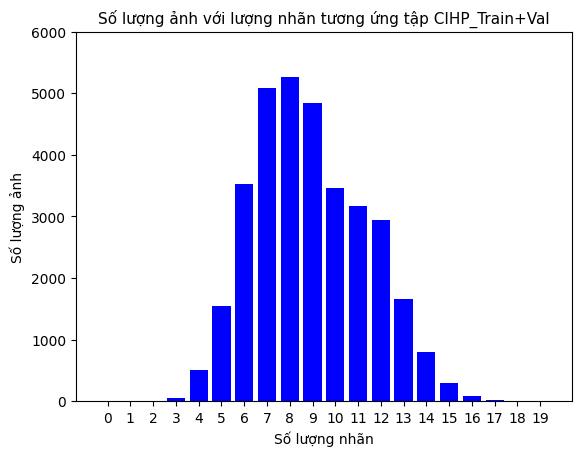

In [ ]:
# Tạo column chart
plt.bar(range(20), img_count_as_label_amount_no_bg, color="blue")
plt.xticks(range(20))
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn")
plt.ylabel("Số lượng ảnh")
plt.title("Số lượng ảnh với lượng nhãn tương ứng tập CIHP_Train+Val", fontsize=11)
plt.ylim(0,6000)
# Hiện plot
plt.show()

Chỉ số thống kê

In [ ]:
# Thống kê dựa trên số lượng nhãn
print(f"Range: [{min(label_array_uvc_no_bg)}, {max(label_array_uvc_no_bg)}]")
print("Mean: %0.1f" % (np.mean(np.array(label_array_uvc_no_bg))))
print("Variance: %0.1f" % (np.var(np.array(label_array_uvc_no_bg))))
print("STD: %0.1f" % (np.std(np.array(label_array_uvc_no_bg))))

Range: [2, 18]
Mean: 8.9
Variance: 6.1
STD: 2.5


## 4.6. Thống kê tỉ lệ nhãn bộ phận người và nhãn trang phục trên mỗi ảnh

In [ ]:
# Chuẩn bị data
human_label_per_img = [0] * len(category_ids_trainval)
non_human_label_per_img = [0] * len(category_ids_trainval)
for i, label_array in enumerate(category_label_unique_value):
  for label_idx in label_array:
    if label_is_human_part[label_idx]:
      human_label_per_img[i] += 1
    else:
      non_human_label_per_img[i] += 1
# Không tính background nên trừ bớt 1
for i in range(len(non_human_label_per_img)):
  non_human_label_per_img[i] -= 1
# Tạo ndarray data
data02 = np.zeros((max(non_human_label_per_img)+1, max(human_label_per_img)+1))
for i in range(len(human_label_per_img)):
  data02[non_human_label_per_img[i]][human_label_per_img[i]] += 1

In [ ]:
sum(sum(data02))

33280.0

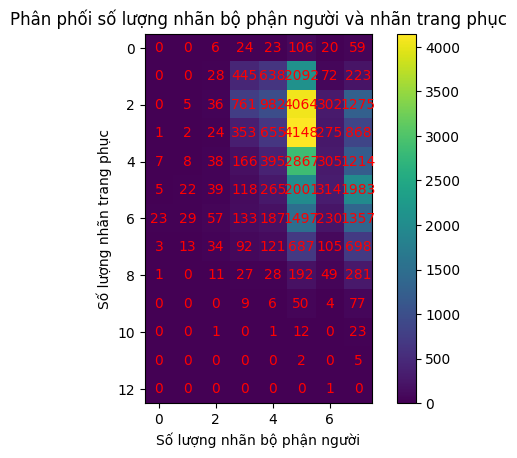

In [ ]:
# Tạo plot
plt.imshow(data02, interpolation='nearest')
plt.colorbar()
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn bộ phận người")
plt.ylabel("Số lượng nhãn trang phục")
plt.title("Phân phối số lượng nhãn bộ phận người và nhãn trang phục")
# Đánh số lên heatmap
for i in range(data02.shape[0]):
  for j in range(data02.shape[1]):
    plt.annotate(str(int(data02[i][j])), xy=(j, i),
                     ha='center', va='center', color='red')
# Hiện plot
plt.show()

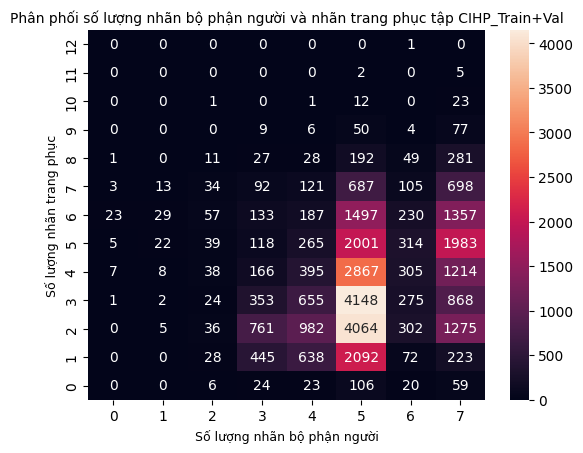

In [ ]:
hm = sns.heatmap(data=data02, annot=True, fmt='g')
hm.invert_yaxis()
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn bộ phận người", fontsize=9)
plt.ylabel("Số lượng nhãn trang phục", fontsize=9)
plt.title("Phân phối số lượng nhãn bộ phận người và nhãn trang phục tập CIHP_Train+Val", fontsize=10)
# Hiện biểu đồ
plt.show()

Thống kê số nhãn

In [ ]:
# Thống kê về số nhãn bộ phận người mỗi ảnh
print("Range: [%d, %d]" % (min(human_label_per_img), max(human_label_per_img)))
print("Mean: %.1f" % (np.mean(np.array(human_label_per_img))))
print("Variance: %.1f" % (np.var(np.array(human_label_per_img))))
print("STD: %.1f" % (np.std(np.array(human_label_per_img))))
# Thống kê về số nhãn quần áo mỗi ảnh
print("Range: [%d, %d]" % (min(non_human_label_per_img), max(non_human_label_per_img)))
print("Mean: %.1f" % (np.mean(np.array(non_human_label_per_img))))
print("Variance: %.1f" % (np.var(np.array(non_human_label_per_img))))
print("STD: %.1f" % (np.std(np.array(non_human_label_per_img))))

Range: [0, 7]
Mean: 5.3
Variance: 1.4
STD: 1.2
Range: [0, 12]
Mean: 3.6
Variance: 3.5
STD: 1.9


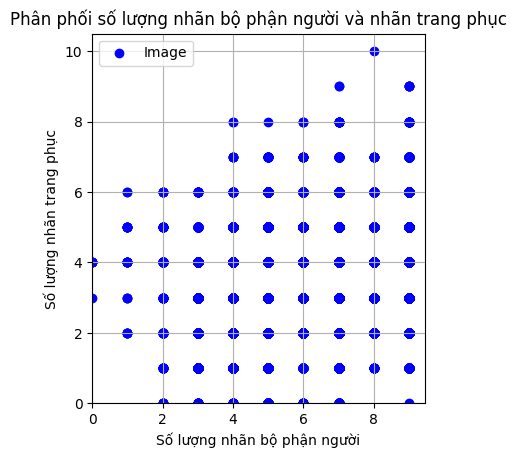

In [ ]:
# Tạo plot
plt.scatter(human_label_per_img, non_human_label_per_img, label="Image", color="blue")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(left=0)
plt.ylim(bottom=0)
# Đánh tên cho trục
plt.xlabel("Số lượng nhãn bộ phận người")
plt.ylabel("Số lượng nhãn trang phục")
plt.title("Phân phối số lượng nhãn bộ phận người và nhãn trang phục")
plt.legend(loc="best")
# Hiện plot
plt.show()